# Facebook Page Analysis

In [2]:
import pickle
import pandas as pd
import string
from operator import itemgetter

In [295]:
loaded_data = pickle.load(file=open('steam_data.pkl'))
print type(loaded_data)

<type 'list'>


In [44]:
steam_df = pd.io.json.json_normalize(data=loaded_data)

In [56]:
steam_df.head(10)


,total_comments,created_time,id,total_likes,message
0,1,2017-06-06T23:30:56+0000,67919847338_10154713107207339,52,FORM is Now Available on Steam and is 25% off!...
1,29,2017-06-06T20:28:20+0000,67919847338_10154712706182339,250,The Elder Scrolls Online - Morrowind is Now Av...
2,154,2017-06-06T18:10:50+0000,67919847338_10154712272662339,680,Add Outland to your account for FREE starting ...
3,21,2017-06-06T17:38:01+0000,67919847338_10154712206987339,83,Battlesloths 2025: The Great Pizza Wars is Now...
4,4,2017-06-06T17:10:33+0000,67919847338_10154712152902339,77,Today's Deal: Save 75% on Democracy 3 !*\n\nLo...
5,19,2017-06-06T17:10:32+0000,67919847338_10154712152882339,227,Hellblade: Senua's Sacrifice is Now Available ...
6,12,2017-06-06T17:10:31+0000,67919847338_10154712152812339,131,Save 50% on The Evil Within during this week's...
7,41,2017-06-05T17:08:58+0000,67919847338_10154709357777339,288,Today's Deal: Save 80% on Mark of the Ninja !*...
8,29,2017-06-04T17:08:38+0000,67919847338_10154706343297339,215,Today's Deal: Save 40% on Orwell !*\n\nLook fo...
9,22,2017-06-03T17:11:07+0000,67919847338_10154702828957339,202,Today's Deal: Save 75% on Sheltered !*\n\nLook...


In [46]:
steam_df.columns

Index([u'comments.data', u'comments.summary.order',
       u'comments.summary.total_count', u'created_time', u'id', u'likes.data',
       u'likes.summary.total_count', u'message'],
      dtype='object')

### Tailoring the data

In [52]:
steam_df.columns[0]
## steam_df.drop('comments.data',1)
steam_df.drop(steam_df.columns[[0,1,5]],1, inplace=True)

In [53]:
steam_df.rename(columns = {'comments.summary.total_count': 'total_comments'}, inplace=True)
steam_df.rename(columns = {'likes.summary.total_count': 'total_likes'}, inplace=True)

### Pandas examples

In [57]:
steam_df[steam_df['total_comments'] > 100]

,total_comments,created_time,id,total_likes,message
2,154,2017-06-06T18:10:50+0000,67919847338_10154712272662339,680,Add Outland to your account for FREE starting ...
41,212,2017-05-25T17:24:40+0000,67919847338_10154677698057339,1205,Play Fallout 4 for FREE starting now through S...
47,168,2017-05-24T19:21:47+0000,67919847338_10154675221992339,390,Black Desert Online is Now Available on Steam ...
51,324,2017-05-23T17:17:21+0000,67919847338_10154672194232339,1193,Grand Theft Auto V is on sale now!*\n\n*Offer ...
57,168,2017-05-22T17:29:54+0000,67919847338_10154669291497339,805,Get Starpoint Gemini 2 for FREE starting now u...
60,158,2017-05-19T17:33:52+0000,67919847338_10154660337272339,307,Endless SpaceÂ® 2 is Now Available!\n\nThe seq...
79,163,2017-05-15T17:00:51+0000,67919847338_10154647917527339,527,Today's Deal: Save 75% on Command & Conquer Fr...
81,193,2017-05-13T17:22:58+0000,67919847338_10154642435562339,1445,Today's Deal: Save 90% on Alan Wake !*\n\nLook...
97,532,2017-05-08T12:08:09+0000,67919847338_10154626332467339,522,Metin2 is Now Available on Steam!\n\nBecome a ...
128,112,2017-04-26T16:51:02+0000,67919847338_10154595708442339,606,Tune in at 10am Pacific to watch the Worldwide...


### Most Commented on Posts

In [64]:
top_comments = steam_df.sort_values('total_comments', ascending = False)

In [90]:
top_comments.head(10)

,total_comments,created_time,id,total_likes,message
97,532,2017-05-08T12:08:09+0000,67919847338_10154626332467339,522,Metin2 is Now Available on Steam!\n\nBecome a ...
139,352,2017-04-25T04:24:12+0000,67919847338_10154591914387339,2862,Outlast 2 is Now Available on Steam!\n\nOutlas...
51,324,2017-05-23T17:17:21+0000,67919847338_10154672194232339,1193,Grand Theft Auto V is on sale now!*\n\n*Offer ...
41,212,2017-05-25T17:24:40+0000,67919847338_10154677698057339,1205,Play Fallout 4 for FREE starting now through S...
81,193,2017-05-13T17:22:58+0000,67919847338_10154642435562339,1445,Today's Deal: Save 90% on Alan Wake !*\n\nLook...
57,168,2017-05-22T17:29:54+0000,67919847338_10154669291497339,805,Get Starpoint Gemini 2 for FREE starting now u...
47,168,2017-05-24T19:21:47+0000,67919847338_10154675221992339,390,Black Desert Online is Now Available on Steam ...
79,163,2017-05-15T17:00:51+0000,67919847338_10154647917527339,527,Today's Deal: Save 75% on Command & Conquer Fr...
60,158,2017-05-19T17:33:52+0000,67919847338_10154660337272339,307,Endless SpaceÂ® 2 is Now Available!\n\nThe seq...
2,154,2017-06-06T18:10:50+0000,67919847338_10154712272662339,680,Add Outland to your account for FREE starting ...


In [251]:
top_comments_id = top_comments['id'].head(10)

97     67919847338_10154626332467339
139    67919847338_10154591914387339
51     67919847338_10154672194232339
41     67919847338_10154677698057339
81     67919847338_10154642435562339
57     67919847338_10154669291497339
47     67919847338_10154675221992339
79     67919847338_10154647917527339
60     67919847338_10154660337272339
2      67919847338_10154712272662339
Name: id, dtype: object

In [103]:
for i,x in top_comments_id.iteritems():
    #print i, x
    print ('https://www.facebook.com/' + x)

https://www.facebook.com/67919847338_10154626332467339
https://www.facebook.com/67919847338_10154591914387339
https://www.facebook.com/67919847338_10154672194232339
https://www.facebook.com/67919847338_10154677698057339
https://www.facebook.com/67919847338_10154642435562339
https://www.facebook.com/67919847338_10154669291497339
https://www.facebook.com/67919847338_10154675221992339
https://www.facebook.com/67919847338_10154647917527339
https://www.facebook.com/67919847338_10154660337272339
https://www.facebook.com/67919847338_10154712272662339


### Most Liked Posts

In [80]:
steam_df[steam_df['total_likes'] > 100]

,total_comments,created_time,id,total_likes,message
1,29,2017-06-06T20:28:20+0000,67919847338_10154712706182339,250,The Elder Scrolls Online - Morrowind is Now Av...
2,154,2017-06-06T18:10:50+0000,67919847338_10154712272662339,680,Add Outland to your account for FREE starting ...
5,19,2017-06-06T17:10:32+0000,67919847338_10154712152882339,227,Hellblade: Senua's Sacrifice is Now Available ...
6,12,2017-06-06T17:10:31+0000,67919847338_10154712152812339,131,Save 50% on The Evil Within during this week's...
7,41,2017-06-05T17:08:58+0000,67919847338_10154709357777339,288,Today's Deal: Save 80% on Mark of the Ninja !*...
8,29,2017-06-04T17:08:38+0000,67919847338_10154706343297339,215,Today's Deal: Save 40% on Orwell !*\n\nLook fo...
9,22,2017-06-03T17:11:07+0000,67919847338_10154702828957339,202,Today's Deal: Save 75% on Sheltered !*\n\nLook...
10,22,2017-06-02T17:15:47+0000,67919847338_10154699940722339,191,Blitzkrieg 3 is Now Available on Steam!\n\nBli...
11,8,2017-06-02T14:05:50+0000,67919847338_10154699563147339,124,AereA is Now Available on Steam and is 15% off...
12,34,2017-06-01T22:51:14+0000,67919847338_10154697976352339,283,Ultimate Epic Battle Simulator is Now Availabl...


In [81]:
most_liked = steam_df.sort_values('total_likes', ascending=False)

In [83]:
most_liked.head()

,total_comments,created_time,id,total_likes,message
139,352,2017-04-25T04:24:12+0000,67919847338_10154591914387339,2862,Outlast 2 is Now Available on Steam!\n\nOutlas...
81,193,2017-05-13T17:22:58+0000,67919847338_10154642435562339,1445,Today's Deal: Save 90% on Alan Wake !*\n\nLook...
41,212,2017-05-25T17:24:40+0000,67919847338_10154677698057339,1205,Play Fallout 4 for FREE starting now through S...
51,324,2017-05-23T17:17:21+0000,67919847338_10154672194232339,1193,Grand Theft Auto V is on sale now!*\n\n*Offer ...
13,92,2017-06-01T22:20:44+0000,67919847338_10154697914217339,987,TEKKEN 7 is Now Available on Steam!\n\nDiscove...


In [100]:
most_liked_id = most_liked['id'].head(10)
most_liked_id

139    67919847338_10154591914387339
81     67919847338_10154642435562339
41     67919847338_10154677698057339
51     67919847338_10154672194232339
13     67919847338_10154697914217339
57     67919847338_10154669291497339
45     67919847338_10154677431477339
2      67919847338_10154712272662339
121    67919847338_10154599033187339
132    67919847338_10154593413757339
Name: id, dtype: object

In [101]:
for i, x in most_liked_id.iteritems():
    print ('https://facebook.com/'+x)

https://facebook.com/67919847338_10154591914387339
https://facebook.com/67919847338_10154642435562339
https://facebook.com/67919847338_10154677698057339
https://facebook.com/67919847338_10154672194232339
https://facebook.com/67919847338_10154697914217339
https://facebook.com/67919847338_10154669291497339
https://facebook.com/67919847338_10154677431477339
https://facebook.com/67919847338_10154712272662339
https://facebook.com/67919847338_10154599033187339
https://facebook.com/67919847338_10154593413757339


### Counting top words

In [154]:
def count_words(df):
    stop_words=[
    'a',
    'about',
    'above',
    'after',
    'again',
    'against',
    'all',
    'am',
    'an',
    'and',
    'any',
    'are',
    "aren't",
    'as',
    'at',
    'be',
    'because',
    'been',
    'before',
    'being',
    'below',
    'between',
    'both',
    'but',
    'by',
    "can't",
    'cannot',
    'could',
    "couldn't",
    'did',
    "didn't",
    'do',
    'does',
    "doesn't",
    'doing',
    "don't",
    'down',
    'during',
    'each',
    'few',
    'for',
    'from',
    'further',
    'had',
    "hadn't",
    'has',
    "hasn't",
    'have',
    "haven't",
    'having',
    'he',
    "he'd",
    "he'll",
    "he's",
    'her',
    'here',
    "here's",
    'hers',
    'herself',
    'him',
    'himself',
    'his',
    'how',
    "how's",
    'i',
    "i'd",
    "i'll",
    "i'm",
    "i've",
    'if',
    'in',
    'into',
    'is',
    "isn't",
    'it',
    "it's",
    'its',
    'itself',
    "let's",
    'me',
    'more',
    'most',
    "mustn't",
    'my',
    'myself',
    'no',
    'nor',
    'not',
    'of',
    'off',
    'on',
    'once',
    'only',
    'or',
    'other',
    'ought',
    'our',
    'ours',
    'ourselves',
    'out',
    'over',
    'own',
    'same',
    "shan't",
    'she',
    "she'd",
    "she'll",
    "she's",
    'should',
    "shouldn't",
    'so',
    'some',
    'such',
    'than',
    'that',
    "that's",
    'the',
    'their',
    'theirs',
    'them',
    'themselves',
    'then',
    'there',
    "there's",
    'these',
    'they',
    "they'd",
    "they'll",
    "they're",
    "they've",
    'this',
    'those',
    'through',
    'to',
    'too',
    'under',
    'until',
    'up',
    'very',
    'was',
    "wasn't",
    'we',
    "we'd",
    "we'll",
    "we're",
    "we've",
    'were',
    "weren't",
    'what',
    "what's",
    'when',
    "when's",
    'where',
    "where's",
    'which',
    'while',
    'who',
    "who's",
    'whom',
    'why',
    "why's",
    'with',
    "won't",
    'would',
    "wouldn't",
    'you',
    "you'd",
    "you'll",
    "you're",
    "you've",
    'your',
    'yours',
    'yourself',
    'yourselves',
    'zero']
    mapping = dict.fromkeys(map(ord, string.punctuation))
    
    words = {}
    
    for m in df['message']:
        try:
            separated_words = m.split(' ')
        except: 
            print "ERROR"+str(m)
        for word in separated_words:
            word = word.strip()
            word = word.lower()
            word = word.translate(mapping) # Removes any punctuation
            if word in stop_words:
                continue
            if len(word) < 2:
                continue
            if word in words:
                words[word]+=1
            else:
                words[word]=1
    print('Done counting words')
    return words

In [155]:
words = count_words(steam_df)

Done counting words


In [156]:
words_df = pd.DataFrame(words.items(), columns=['Word', 'count'])
words_df

,Word,count
0,aided,1
1,todays,44
2,steam\n\nadventure,1
3,dynamic,1
4,four,2
5,mansion,1
6,captain,1
7,revenge\n\noffer,1
8,electricity,1
9,endings,1


In [157]:
words_df.sort_values('count', ascending=False, inplace=True)

In [158]:
words_df

,Word,count
1252,pacific,105
430,time,103
1529,ends,96
1086,10am,96
226,steam,96
549,now,93
1127,available,72
1344,save,63
1414,day,46
1258,us,46


In [168]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

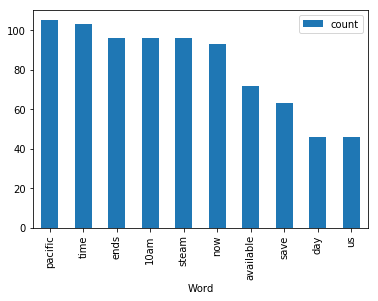

In [171]:
%matplotlib inline
words_df[words_df['count'] > 45].plot(x='Word', kind='bar')


In [174]:
months = ['january',
         'february',
         'march',
         'april',
         'may',
         'june',
         'july',
         'august',
         'september',
         'octobor',
         'november',
         'december']
print words_df[words_df['Word'].isin(months)]

       Word  count
513     may     20
1700   june     15
1542  april      1


In [176]:
steam_df.head(10)


,total_comments,created_time,id,total_likes,message
0,1,2017-06-06T23:30:56+0000,67919847338_10154713107207339,52,FORM is Now Available on Steam and is 25% off!...
1,29,2017-06-06T20:28:20+0000,67919847338_10154712706182339,250,The Elder Scrolls Online - Morrowind is Now Av...
2,154,2017-06-06T18:10:50+0000,67919847338_10154712272662339,680,Add Outland to your account for FREE starting ...
3,21,2017-06-06T17:38:01+0000,67919847338_10154712206987339,83,Battlesloths 2025: The Great Pizza Wars is Now...
4,4,2017-06-06T17:10:33+0000,67919847338_10154712152902339,77,Today's Deal: Save 75% on Democracy 3 !*\n\nLo...
5,19,2017-06-06T17:10:32+0000,67919847338_10154712152882339,227,Hellblade: Senua's Sacrifice is Now Available ...
6,12,2017-06-06T17:10:31+0000,67919847338_10154712152812339,131,Save 50% on The Evil Within during this week's...
7,41,2017-06-05T17:08:58+0000,67919847338_10154709357777339,288,Today's Deal: Save 80% on Mark of the Ninja !*...
8,29,2017-06-04T17:08:38+0000,67919847338_10154706343297339,215,Today's Deal: Save 40% on Orwell !*\n\nLook fo...
9,22,2017-06-03T17:11:07+0000,67919847338_10154702828957339,202,Today's Deal: Save 75% on Sheltered !*\n\nLook...


### Counting and displaying posts that contain the word 'free' and 'discount'

In [196]:
steam_df['free'] = steam_df.message.str.contains('free')
steam_df['discount'] = steam_df.message.str.contains('discount')

In [197]:
steam_df.head(100)

,total_comments,created_time,id,total_likes,message,free,discount
0,1,2017-06-06T23:30:56+0000,67919847338_10154713107207339,52,FORM is Now Available on Steam and is 25% off!...,False,False
1,29,2017-06-06T20:28:20+0000,67919847338_10154712706182339,250,The Elder Scrolls Online - Morrowind is Now Av...,False,False
2,154,2017-06-06T18:10:50+0000,67919847338_10154712272662339,680,Add Outland to your account for FREE starting ...,False,False
3,21,2017-06-06T17:38:01+0000,67919847338_10154712206987339,83,Battlesloths 2025: The Great Pizza Wars is Now...,False,False
4,4,2017-06-06T17:10:33+0000,67919847338_10154712152902339,77,Today's Deal: Save 75% on Democracy 3 !*\n\nLo...,False,False
5,19,2017-06-06T17:10:32+0000,67919847338_10154712152882339,227,Hellblade: Senua's Sacrifice is Now Available ...,False,False
6,12,2017-06-06T17:10:31+0000,67919847338_10154712152812339,131,Save 50% on The Evil Within during this week's...,False,False
7,41,2017-06-05T17:08:58+0000,67919847338_10154709357777339,288,Today's Deal: Save 80% on Mark of the Ninja !*...,False,False
8,29,2017-06-04T17:08:38+0000,67919847338_10154706343297339,215,Today's Deal: Save 40% on Orwell !*\n\nLook fo...,False,False
9,22,2017-06-03T17:11:07+0000,67919847338_10154702828957339,202,Today's Deal: Save 75% on Sheltered !*\n\nLook...,False,False


In [216]:
steam_df.groupby(by = steam_df['free']).count()['id']

free
False    141
True       7
Name: id, dtype: int64

In [205]:
steam_df.groupby(by = steam_df['discount']).count()['id']

discount
False    147
True       1
Name: id, dtype: int64

In [256]:
free_id = steam_df[steam_df.free==True]['id']
for i, x in free_id.iteritems():
    print 'https://facebook.com/' + x

https://facebook.com/67919847338_10154694543122339
https://facebook.com/67919847338_10154691714427339
https://facebook.com/67919847338_10154691672187339
https://facebook.com/67919847338_10154675222107339
https://facebook.com/67919847338_10154669291497339
https://facebook.com/67919847338_10154657635722339
https://facebook.com/67919847338_10154657398577339
https://facebook.com/67919847338_10154616507957339


In [257]:
discount_id = steam_df[steam_df.discount==True]['id']
for i, x in discount_id.iteritems():
    print 'https://facebook.com/' + x

https://facebook.com/67919847338_10154616507957339


### Group posts by date

In [259]:
steam_df.head()

,total_comments,created_time,id,total_likes,message,free,discount
0,1,2017-06-06T23:30:56+0000,67919847338_10154713107207339,52,FORM is Now Available on Steam and is 25% off!...,False,False
1,29,2017-06-06T20:28:20+0000,67919847338_10154712706182339,250,The Elder Scrolls Online - Morrowind is Now Av...,False,False
2,154,2017-06-06T18:10:50+0000,67919847338_10154712272662339,680,Add Outland to your account for FREE starting ...,False,False
3,21,2017-06-06T17:38:01+0000,67919847338_10154712206987339,83,Battlesloths 2025: The Great Pizza Wars is Now...,False,False
4,4,2017-06-06T17:10:33+0000,67919847338_10154712152902339,77,Today's Deal: Save 75% on Democracy 3 !*\n\nLo...,False,False


In [261]:
type(steam_df.created_time.loc[0])

unicode

In [267]:
date_df = pd.DataFrame(pd.to_datetime(steam_df.created_time))
date_df.head()

,created_time
0,2017-06-06 23:30:56
1,2017-06-06 20:28:20
2,2017-06-06 18:10:50
3,2017-06-06 17:38:01
4,2017-06-06 17:10:33


In [270]:
date_df.created_time.loc[0]

Timestamp('2017-06-06 23:30:56')

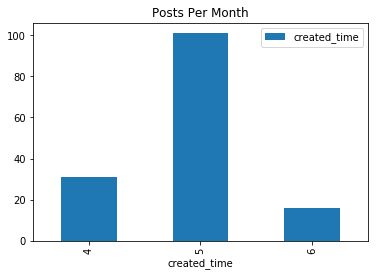

In [282]:
%matplotlib inline
fig = date_df.groupby(date_df.created_time.dt.month).count().plot(kind='bar',title='Posts Per Month')
fig

In [285]:
date_df.groupby(date_df.created_time.dt.month).count().head()

,created_time
created_time,
4,31
5,101
6,16


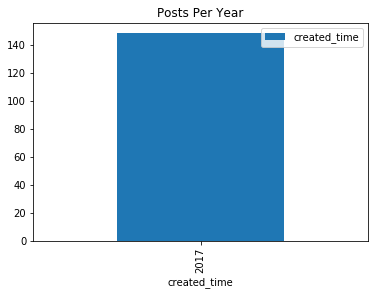

In [288]:
date_df.groupby(date_df.created_time.dt.year).count().plot(kind='bar',title='Posts Per Year')

In [294]:
date_df[date_df.created_time > '1-1-2017']

,created_time
0,2017-06-06 23:30:56
1,2017-06-06 20:28:20
2,2017-06-06 18:10:50
3,2017-06-06 17:38:01
4,2017-06-06 17:10:33
5,2017-06-06 17:10:32
6,2017-06-06 17:10:31
7,2017-06-05 17:08:58
8,2017-06-04 17:08:38
9,2017-06-03 17:11:07
